In [196]:
import io
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np
import random as rd

Job 3.0

In [471]:
a=input()
try:
    with open('output.txt','w') as txt:
        txt.write(a)
        print("File output.txt created successfully.")
except IOError:
    print('erreur')

File output.txt created successfully.


Job 3.1

In [472]:
r=open('output.txt','r')
r.read()

'May the force be with you'

Job 3.2

In [476]:
# On ouvre le fichier, on cherche toutes les combinaisons avec nimporte quel caractère puis un point puis 2 ou 3 lettres minuscules, suivi d'un caractère qui n'est pas 
# une lettre minuscule, on prend ensuite la partie du string qui nous intéresse.

r1=open('domains.xml','r').read()
pattern=re.compile('.\.[a-z][a-z]?[a-z][^a-z]')
domains=pattern.findall(r1)
domains=[i[2:-1] for i in domains]
domains=list(set(domains))
print(domains)

['ws', 'xl', 'com', 'org', 'net', 'ht', 'eu', 'web', 'biz', 'cc', 'zik', 'by', 'it', 'nu', 'ru', 'in', 'me', 'lv', 'us', 'fr', 'ze', 'co', 'la', 'at', 'de', 'tk']


Job 3.3

In [477]:
# on veut créer une liste de mots avec tous les mots extraits du texte. On cherche donc toutes les chaines de charactères alphanumériques (pas de chiffres dans le texte) 
r=open('data.txt','r').read()
pattern=re.compile('\w+')
mots=pattern.findall(r)
print(len(mots))


1175248


Job 3.4

In [478]:
# on prend un nombre entier en input, on se sert d'une serie pandas ensuite pour vérifier une condition sur tous les élements, on retourne ensuite la longueur de la serie

print('entrer nombre entier')
nombre=int(input())
S=pd.Series(mots)
len(S[S.str.len()==nombre])

entrer nombre entier


180230

Job 3.5.1

In [479]:
# on veut créer une liste de lettres à partir de tous les mots récuperés précedemment, on transforme ensuite cette liste pour avoir seulement des lettres minuscules

lettres=[]
for mot in mots:
    for let in mot:
        lettres.append(let)
lettres=list(map(str.lower,lettres))

In [480]:
# on crée une DataFrame pandas qui va nous aider pour sommer et grouper toutes les occurences des lettres

occurences=pd.DataFrame(np.ones(len(lettres)))
occurences['lettre']=lettres

Text(0, 0.5, "Pourcentage d'apparition")

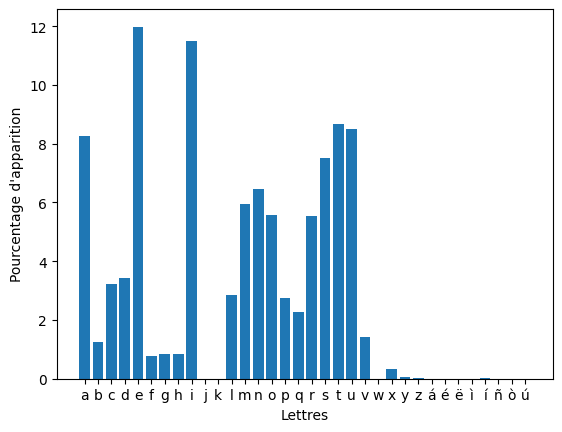

In [481]:
# à partir du nombre d'occurences de chaque lettres, on retrouve facilement le pourcentage d'apparition pour chaque lettre

proba=100*occurences.groupby('lettre').sum()/occurences[0].sum()
plt.bar(proba.index,proba[0])
plt.xlabel('Lettres')
plt.ylabel('Pourcentage d\'apparition')

Job 3.5.1

In [482]:
# de la même façon, nous créons une DataFrame avec tous les mots sur une colonne, nous créons une deuxième colonne qui correspond à la longueur de chaque mots
# en appliquant une fonction à la colonne de mots

comptemot=pd.DataFrame(mots)
comptemot['compte']=np.ones(len(mots))
comptemot[0]=comptemot[0].apply(lambda x: len(x))


Text(0, 0.5, "Pourcentage d'apparition")

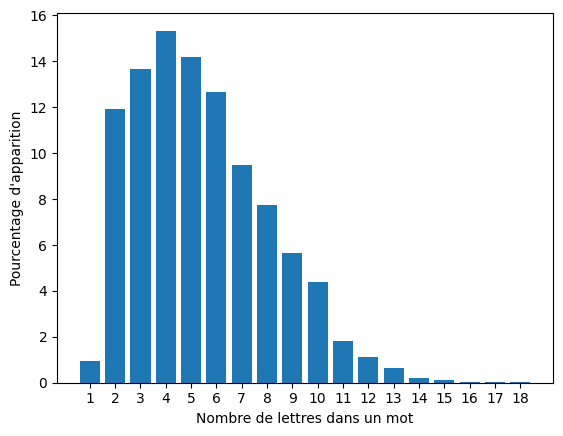

In [483]:
# idem que précedemment pour tracer l'histogramme

pourcentage=100*comptemot.groupby(0).sum()/comptemot['compte'].sum()
plt.bar(pourcentage.index,pourcentage['compte'])
plt.xticks(pourcentage.index)
plt.xlabel('Nombre de lettres dans un mot')
plt.ylabel('Pourcentage d\'apparition')

Job 3.6

In [484]:
# à l'aide de la liste de mots, on extrait une liste des premières lettres de chaque mots

premiereslettres=[i[0] for i in mots]
premiereslettres=list(map(str.lower,premiereslettres))

In [485]:
# on crée une DataFrame pour faire pareil qu'avant

comptepremlettre=pd.DataFrame(premiereslettres)
comptepremlettre['compte']=np.ones(len(premiereslettres))


Text(0, 0.5, "Pourcentage d'apparition")

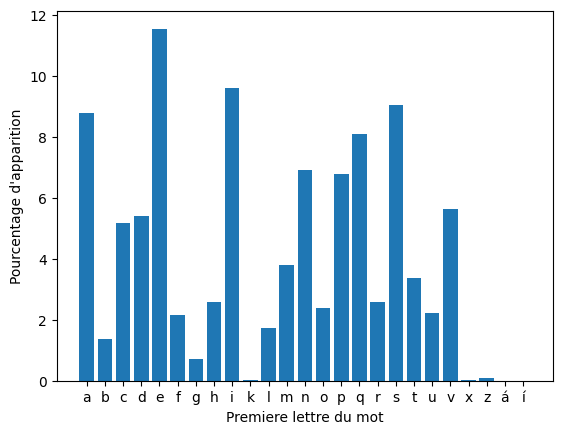

In [486]:
# même méthode que avant pour calculer et tracer

probpremlettre=100*comptepremlettre.groupby(0).sum()/comptepremlettre['compte'].sum()
plt.bar(probpremlettre.index,probpremlettre['compte'])
plt.xticks(probpremlettre.index)
plt.xlabel('Premiere lettre du mot')
plt.ylabel('Pourcentage d\'apparition')


Job 3.7 (on prend en compte toutes les suite de lettres, même a et b dans le cas "Bonjour a! b")

In [487]:
# on crée une liste de liste de toutes les deux lettres qui se suivent: 'hello' --> [['h','e'],['e','l'],['l','l'],['l','o']]

aidelettres=[]
for mot in list(map(str.lower,mots)):
    for i in range(len(mot)-1):
        aidelettres.append([mot[i],mot[i+1]])




In [493]:
# on crée une DataFrame avec une colonne pour la premiere lettre, une colonne pour la deuxième et une troisième pour compter

prochlettre=pd.DataFrame(aidelettres)
prochlettre['compte']=np.ones(len(aidelettres))

In [494]:
# on groupe avec les deux premières colonnes et on somme pour avoir toutes les occurences de deux lettres qui se suivent

prochlettre=prochlettre.groupby([0,1]).sum()


In [495]:
# on crée une grande DataFrame avec tous les caractères en indice et tous les caractères en nom de colonnes (tableau croisé), pour récapituler ce qu'on a fait précedemment et 
# faciliter le traçage de matplotlib

recap=pd.DataFrame(np.zeros([len(set(lettres)),len(set(lettres))]))
colind=list(set(lettres))
colind.sort()
recap.index=colind
recap.columns=colind

In [496]:
for i in prochlettre.index:
    recap[i[0]][i[1]]=prochlettre.loc[i[0],i[1]]

C:\Users\vadim\AppData\Local\Temp\ipykernel_5252\520961815.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  recap[i[0]][i[1]]=prochlettre.loc[i[0],i[1]]
C:\Users\vadim\AppData\Local\Temp\ipykernel_5252\520961815.py:2: FutureWarning: Calli

Text(0, 0.5, "Pourcentage d'apparition")

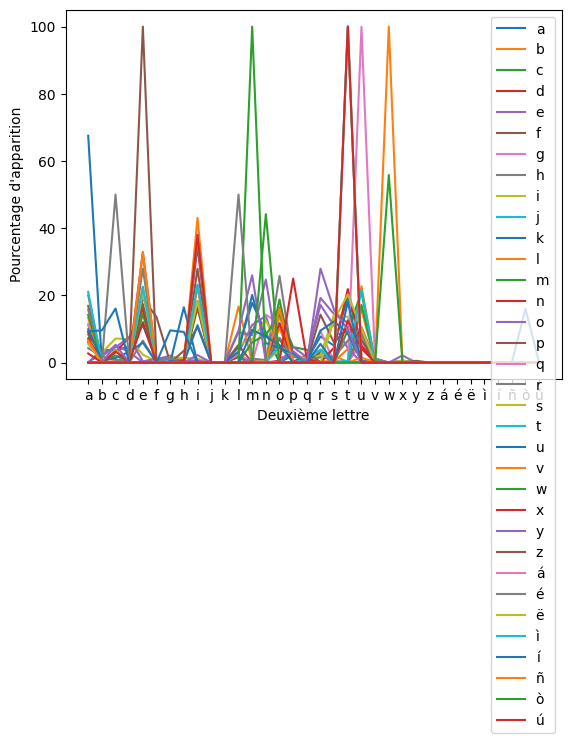

In [497]:
# de la meme facon qu'avant,on calcule et on trace le tableau

recap=100*recap/recap.sum().transpose()

plt.plot(recap)
plt.legend(recap.index)
plt.xlabel('Deuxième lettre')
plt.ylabel('Pourcentage d\'apparition')

Job 3.9

In [498]:
# on cherche tous les noms propres au milieu d'une phrase

pattern=re.compile('\w\s[A-Z][a-z]+')
pattern.findall(r)

['m Ciceronem',
 'o Reges',
 'b Aristotele',
 'a Theophrasto',
 's Epicurus',
 'm Epicurus',
 'm Torquatus',
 's Stoicos',
 'a Peripateticis',
 'd Ptolomaeum',
 't Epicurum',
 'b Epicuro',
 'r Lucius',
 'm Ciceronem',
 'a Cyrenaicos',
 'd Epicurum',
 'a Aristippum',
 'i Demosthenes',
 't Aeschines',
 'n Archimede',
 'b Aristotele',
 'a Theophrasto',
 'm Stoici',
 'm Epicuri',
 'm Latine',
 'n Epicuri',
 'm Antiochus',
 'm Aristoteli',
 't Polemonis',
 'm Charmides',
 'n Archimede',
 'a Zenone',
 't Quare',
 'd Stoicos',
 'e Aristoteli',
 'n Aristonea',
 'b Epicuro',
 'a Laelio',
 'o Stoicos',
 'm Codrum',
 's Erechthei',
 'b Antiocho',
 'r Peripateticum',
 'o Latina',
 'r Stoici',
 'm Zenoni',
 'm Zenonis',
 't Aristo',
 't Edere',
 'm Epicurus',
 'r Antiochus',
 't Manliana',
 'e Aristoteli',
 'e Pyrrhonem',
 't Aristonem',
 'm Stoicus',
 'm Latinorum',
 't Platoni',
 't Epicurum',
 'm Stoicus',
 'm Piso',
 'd Lucius',
 'm Zenoni',
 't Catoni',
 'n Graece',
 's Erillus',
 'r Peripatet

Trop de noms propres pour trouver le Pokemon, on prend un dictionnaire en ligne

In [188]:
listpokemon=open('pokemon-list-en.txt','r').read()
listpokemon=listpokemon.split()

In [499]:
# on cherche pour chaque mot présent dans le texte si il est dans le dictionnaire

for mot in list(map(str.lower,mots)):
    if mot in listpokemon:
        print(mot)

psyduck


Job 3.8 Générateur de mots

In [500]:
# on crée une fonction qui va générer selon les poids calculés précédemment, la longueur du mot, la première lettre, et toutes les lettres suivantes

def gen_mots():
    
    rand=rd.uniform(0,100)
    longu_mot=int(rd.choices(pourcentage.index,weights=pourcentage['compte'],k=1)[0])
    prem_lettre=rd.choices(probpremlettre.index,weights=probpremlettre['compte'],k=1)[0]
    mot=prem_lettre
    let=prem_lettre
    for i in range(longu_mot-1):
        letsuiv=rd.choices(recap.index,recap[let],k=1)[0]
        mot+=letsuiv
        let=letsuiv
    return(mot)
    

In [502]:
gen_mots()

'itana'

Job 3.9

In [504]:
#On trouve toutes les phrases (en cherchant les mots qui sont séparés d'un quelconque point, pour trouver le nombre de mots dans chaque phrase. On enlève ensuite la ponctuation
pattern_phrase=re.compile('[^a-zA-Z\d\s:\,\-\:\;]\s[a-zA-Z\d\s:\,\-\:\;]+[^a-zA-Z\d\s:\,\-\:\;]')
phrases=pattern_phrase.findall(r)
phrases1=[re.findall(r'\w+',phr) for phr in phrases]

In [505]:
# on fait une seconde liste avec le nombre de mots dans chaque phrase

nombre_mots=[]
for phrase in phrases1:
    nombre_mots.append(len(phrase))

In [506]:
# comme avant, on fait une DataFrame pour tout faciliter

comptephrase=pd.DataFrame(nombre_mots)
comptephrase['compte']=np.ones(len(nombre_mots))


Text(0, 0.5, "Pourcentage d'apparition")

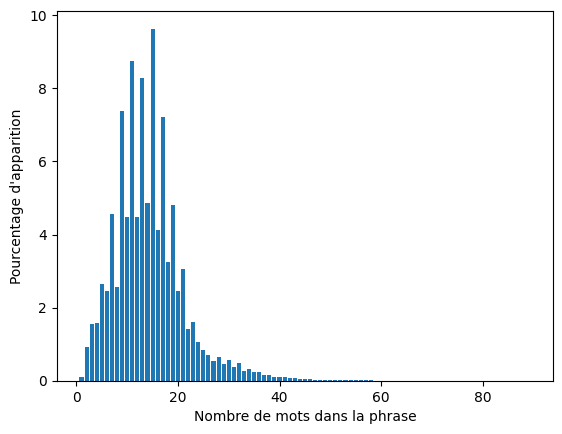

In [507]:
# comme avant, on calcule et on trace ce qu'on a trouvé

pourc_phrase=100*comptephrase.groupby(0).sum()/comptephrase['compte'].sum()
plt.bar(pourc_phrase.index,pourc_phrase['compte'])
plt.xlabel('Nombre de mots dans la phrase')
plt.ylabel('Pourcentage d\'apparition')

In [524]:
# on crée un générateur de phrase
#on génère un nombre de mots dans la phrase selon les pourcentages calculés précedemment, puis pour chaque mot on utilise notre fonction pour générer un mot.
# on rajoute une majuscule au début et un point à la fin pour rendre plus propre.

def gen_phrase():
    long_phrase=rd.choices(pourc_phrase.index,pourc_phrase['compte'],k=1)[0]
    phr=''
    for i in range(long_phrase):
        phr+=' '+gen_mots()
    return(phr[1].upper()+phr[2:]+'.')

In [525]:
gen_phrase()

'Colel iti ptut ntuex ima onen ho fatisetuseriu pem nc.'